In [58]:
#Import Required Libraries
#Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
%matplotlib inline

#Models et al
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
#from sklearn.preprocessing import CategoricalEncoder  #Not yet released!


#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
# Load the data
df_fa = pd.read_pickle('features_all.pkl')  #Pickle format preserves file as python object
df_fa.head()
df_tf = pd.read_pickle('tf.pkl')
#Some quick wrangling

#Fix column headers
df_fa.columns = df_fa.columns.map(''.join)

#Join in Transactions
df_fa = df_fa.join(df_tf, how='inner')

#Drop erroring date fields
#FUTURE: Convert dates to Y, M, D  ######### IMPORTANT, DO THIS!!!!   ###########
df_fa.drop('date_featuresdatemax_date', axis=1, inplace=True)
df_fa.drop('date_featuresdatemin_date', axis=1, inplace=True)
df_fa.drop('transaction_date', axis=1, inplace=True)
df_fa.drop('membership_expire_date', axis=1, inplace=True)

#Convert gender variable (string) to dummy encoding
dummy = pd.get_dummies(df_fa['gender'])
df_fa = pd.concat([df_fa, dummy], axis=1)
df_fa.drop('gender', axis=1, inplace=True)

In [75]:
df_fa.head()

,city,bd,registerd_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,...,Total_amount_paid,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,amount_paid_per_day,female,male
msno,,,,,,,,,,,,,,,,,,,,,
SlQEFsP8unoHeCV5naZtlhd9klqGJyTkYXaudM1ls1s=,1,0,13,20160918,0,161,18,4.500000,4,24076.306,...,745,30,30,149,149,1,0,4.966667,0,0
0XXpgJ9L7btDN0H/y+R5sRwIFDxDiRoRPU1U/jh1f9M=,1,0,13,20161224,0,43,35,17.500000,2,7937.548,...,387,30,30,129,129,1,0,4.300000,0,0
JAyCmh9aHTsNe79eT0qtdU7VubhYitygdTdU4T3fZlA=,1,0,13,20170121,0,38,20,6.666667,3,4013.388,...,200,30,30,100,100,1,0,3.333333,0,0
XzwNNw5S1qNCNjjF23l6DVe8vuWRPFmIy6bmnZVq8Qo=,1,0,13,20161004,0,147,130,18.571429,7,42123.669,...,645,30,30,129,129,1,0,4.300000,0,0
zXjQ9f4C/uJHWw5guWICNbkFBydqdrz77Apch1nyDQ4=,1,0,13,20170108,0,50,16,4.000000,4,3538.666,...,258,30,30,129,129,1,0,4.300000,0,0


In [39]:
df_fa.describe()

,city,bd,registerd_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,...,Total_amount_paid,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,amount_paid_per_day,female,male
count,17375.000000,17375.000000,17375.000000,1.737500e+04,17375.000000,17375.000000,17375.000000,17375.000000,17375.000000,1.737500e+04,...,17375.000000,17375.000000,17375.000000,17375.000000,17375.000000,17375.000000,17375.000000,17375.000000,17375.000000,17375.000000
mean,5.899856,13.655309,6.909353,2.013231e+07,0.060604,511.827281,114.640691,22.840561,4.214964,3.089939e+04,...,2244.684259,38.789353,34.923396,151.943252,151.728978,0.876029,0.028086,4.382727,0.213007,0.234302
std,6.417525,24.630987,1.902575,2.994348e+04,0.238610,272.380749,140.718627,21.512404,2.171056,4.687369e+04,...,1240.486704,3.688759,37.818341,161.696021,161.784288,0.329558,0.165224,0.969093,0.409444,0.423574
min,1.000000,-44.000000,3.000000,2.004033e+07,0.000000,0.000000,1.000000,1.000000,1.000000,1.860000e-01,...,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,7.000000,2.012022e+07,0.000000,269.000000,22.000000,8.500000,2.000000,5.176861e+03,...,1189.500000,38.000000,30.000000,99.000000,99.000000,1.000000,0.000000,3.300000,0.000000,0.000000
50%,1.000000,0.000000,7.000000,2.014052e+07,0.000000,548.000000,69.000000,17.200000,4.000000,1.701584e+04,...,2086.000000,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000,4.966667,0.000000,0.000000
75%,13.000000,27.000000,9.000000,2.016011e+07,0.000000,786.000000,154.000000,30.000000,6.000000,3.888088e+04,...,3354.000000,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000,4.966667,0.000000,0.000000
max,22.000000,1820.000000,13.000000,2.017022e+07,1.000000,789.000000,2062.000000,294.571429,7.000000,2.373079e+06,...,5907.000000,41.000000,450.000000,1788.000000,1788.000000,1.000000,1.000000,6.000000,1.000000,1.000000


In [40]:
for col in df_fa.columns:
    print(col)

city
bd
registerd_via
registration_init_time
is_churn
date_featuresdatelistening_tenure
within_days_7num_unqsum
within_days_7num_unqmean
within_days_7num_unqcount
within_days_7total_secssum
within_days_7total_secsmean
within_days_7num_25sum
within_days_7num_25mean
within_days_7num_50sum
within_days_7num_50mean
within_days_7num_75sum
within_days_7num_75mean
within_days_7num_985sum
within_days_7num_985mean
within_days_7num_100sum
within_days_7num_100mean
within_days_14num_unqsum
within_days_14num_unqmean
within_days_14num_unqcount
within_days_14total_secssum
within_days_14total_secsmean
within_days_14num_25sum
within_days_14num_25mean
within_days_14num_50sum
within_days_14num_50mean
within_days_14num_75sum
within_days_14num_75mean
within_days_14num_985sum
within_days_14num_985mean
within_days_14num_100sum
within_days_14num_100mean
within_days_31num_unqsum
within_days_31num_unqmean
within_days_31num_unqcount
within_days_31total_secssum
within_days_31total_secsmean
within_days_31num_25sum


Text(0,0.5,'Mean Number of Unique listening Periods in the last 7 days')

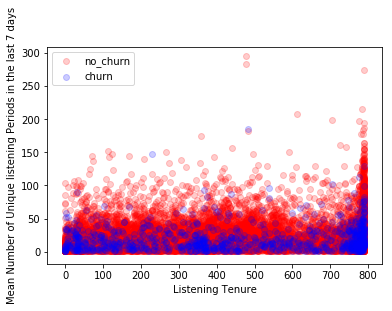

In [42]:
color = ['red', 'blue']
plt.figure()
for color, i, name in zip(color, [0,1], ['no_churn', 'churn']):
    plt.scatter(df_fa[df_fa['is_churn'] == i]['date_featuresdatelistening_tenure'],
               df_fa[df_fa['is_churn'] == i]['within_days_7num_unqmean'], color = color, alpha = 0.2, label = name)
plt.legend(loc = 'best')
plt.xlabel('Listening Tenure')
plt.ylabel('Mean Number of Unique listening Periods in the last 7 days')

Looking at the above plot, we can see that overall people who churn have low numbers of unique plays, meaning they aren't using the music service. We can also see a spike in number of unique plays for users who have a long tenure (>700 days). Intuitively this makes sense as users who are commited to the service (have used the service for a long time) may have developed lifestyle patterns where they use the service while driving/working/etc. 

In [47]:
avg_price_no_churn = round(df_fa[df_fa['is_churn'] == 0]['amount_paid_per_day'].mean(), 2)
avg_price_is_churn = round(df_fa[df_fa['is_churn'] == 1]['amount_paid_per_day'].mean(), 2)
print('Avg cost/day for no churn: %.2f' %avg_price_no_churn)
print('Avg cost/day for churn: %.2f' %avg_price_is_churn)

Avg cost/day for no churn: 4.37
Avg cost/day for churn: 4.56


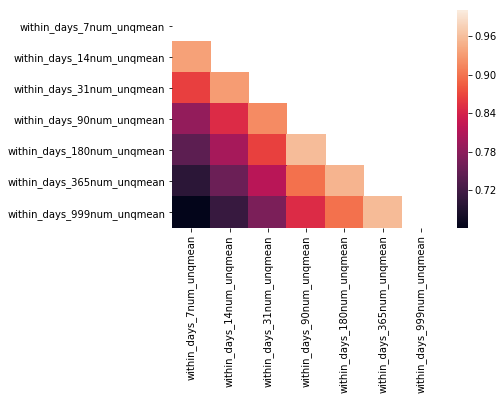

In [88]:
corr = df_fa_noindex.iloc[:, 8:99:15].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask)

The correlation plot above looks at the mean songs that have been played greater than 98.5% of the way through over the course of a specified range. As expected we can see that periods of time 

In [74]:
mean_col = df_fa_noindex.iloc[:, 8:99:15].mean()
mean_col

within_days_7num_unqmean      22.840561
within_days_14num_unqmean     22.927119
within_days_31num_unqmean     23.264613
within_days_90num_unqmean     24.067316
within_days_180num_unqmean    24.410069
within_days_365num_unqmean    24.825765
within_days_999num_unqmean    25.086985
dtype: float64

months = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}
transaction_count = {}
for key, value in months.items():
    transaction_count[key] = len(transactions[pd.DatetimeIndex(transactions['transaction_date']).month == key])
plt.bar(list(transaction_count.keys()), transaction_count.values())
plt.xticks(list(months.keys()), months.values(), rotation = 'vertical')
plt.title('Transaction Count by Month')
plt.show()

Text(0,0.5,'Number of Seconds (Avg) Listed during last 7 days')

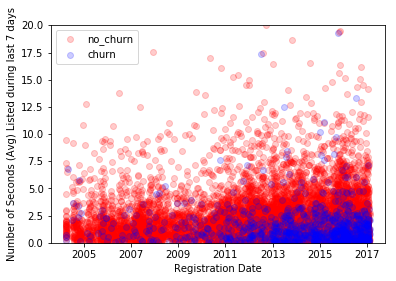

In [106]:
#plt.plot_date(reg_time, df_fa['within_days_7total_secsmean'], )
color = ['red', 'blue']
for color, i, name in zip(color, [0,1], ['no_churn', 'churn']):
    plt.plot_date(pd.to_datetime(df_fa[df_fa['is_churn'] == i]['registration_init_time'], format = '%Y%m%d'),
               df_fa[df_fa['is_churn'] == i]['within_days_7total_secsmean']/(60*60), color = color, alpha = 0.2, label = name)
plt.legend(loc = 'best')
plt.xlabel('Registration Date')
plt.ylim([0,20])
plt.ylabel('Number of Seconds (Avg) Listed during last 7 days')

This plot shows the Registration Date vs Avg seconds listened over past 7 days. The intent will be to change this to transaction date as this will more accurately reflect when the user ends service. We can see a trend in more churn occuring in the last 4 years of the dataset. This could be due to an increased level of users however (same proportion of churn). 

<function matplotlib.pyplot.show>

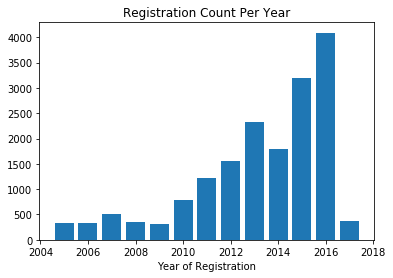

In [149]:
df_fa['registration_time'] = pd.to_datetime(df_fa['registration_init_time'], format = '%Y%m%d').map(lambda x: x.year)
reg_count = []
thirty_day_churn = []
for year in range(2005, 2018):
    reg_count.append(sum(df_fa['registration_time'] == year))
    thirty_day_churn.append(len(df_fa[(df_fa['registration_time'] == year) & (df_fa['date_featuresdatelistening_tenure'] < 30) & (df_fa['is_churn'] == 1)])/sum(df_fa['registration_time'] == year))
plt.bar(range(2005, 2018), reg_count)
plt.xlabel('Year of Registration')
plt.title('Registration Count Per Year')
plt.show

<function matplotlib.pyplot.show>

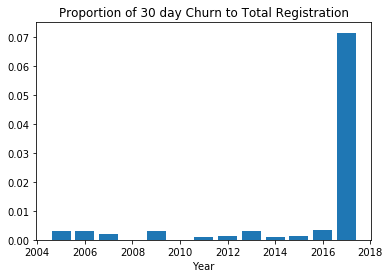

In [150]:
plt.bar(range(2005, 2018), thirty_day_churn)
plt.xlabel('Year')
plt.title('Proportion of 30 day Churn to Total Registration')
plt.show

This statistic shows that there is a high level of churn recently for users who are using a trial subscription, or who a very short duration subscription. From a business perspective this is concerning, because it means that a very high level of churn is occuring, and the problem needs to be solved to reduce churn levels back. The sharp spike may have been when the company started offering 30 days subscriptions or some other factor that has caused increased churn for customers with less than 30 day subscriptionps. 

#TODO
df = df_fa[['date_featuresdatelistening_tenure', 'is_churn']]
df.groupby(['date_featuresdatelistening_tenure', 'is_churn']).sum().unstack()#.plot(kind = 'bar', stacked = False)

ag = df_fa.groupby(['date_featuresdatelistening_tenure', 'is_churn']).sum().unstack()
ag.columns = ag.columns.droplevel()
ag.plot(kind='bar')
#plt.hist(df_fa['date_featuresdatelistening_tenure'])
plt.show()